In [1]:
# python_code_step_2.py

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Define paths to your dataset
train_dir = '/content/drive/MyDrive/FaceDataset/train'
validation_dir = '/content/drive/MyDrive/FaceDataset/val'
test_dir = '/content/drive/MyDrive/FaceDataset/test'

# Data Augmentation and Preprocessing for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Normalize pixel values to [0, 1]
    rotation_range=20,              # Randomly rotate images by 20 degrees
    width_shift_range=0.2,          # Randomly shift images horizontally
    height_shift_range=0.2,         # Randomly shift images vertically
    shear_range=0.2,                # Apply shear transformation
    zoom_range=0.2,                 # Randomly zoom into images
    horizontal_flip=True,           # Randomly flip images horizontally
    fill_mode='nearest'             # Fill in new pixels created by transformations
)

# Preprocessing for Validation and Test (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary' # 'binary' because we have two classes: 'with_mask', 'without_mask'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False # Keep data in order for evaluation if needed later
)

# You can inspect the class labels
print("Class labels:", train_generator.class_indices)

print("\nData generators created successfully!")

Found 5326 images belonging to 2 classes.
Found 1132 images belonging to 2 classes.
Found 1135 images belonging to 2 classes.
Class labels: {'with_mask': 0, 'without_mask': 1}

Data generators created successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
 29/167 ━━━━━━━━━━━━━━━━━━━━ 37s 271ms/step - accuracy: 0.5420 - loss: 0.7941

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 95/167 ━━━━━━━━━━━━━━━━━━━━ 22s 309ms/step - accuracy: 0.6417 - loss: 0.6656

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.6921 - loss: 0.5962
Epoch 1: val_accuracy improved from -inf to 0.89223, saving model to mask_detection_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 61s 339ms/step - accuracy: 0.6926 - loss: 0.5955 - val_accuracy: 0.8922 - val_loss: 0.2818
Epoch 2/20
 88/167 ━━━━━━━━━━━━━━━━━━━━ 24s 306ms/step - accuracy: 0.8256 - loss: 0.3873

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


112/167 ━━━━━━━━━━━━━━━━━━━━ 16s 297ms/step - accuracy: 0.8274 - loss: 0.3853

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.8322 - loss: 0.3795
Epoch 2: val_accuracy did not improve from 0.89223
167/167 ━━━━━━━━━━━━━━━━━━━━ 55s 327ms/step - accuracy: 0.8323 - loss: 0.3794 - val_accuracy: 0.8860 - val_loss: 0.2649
Epoch 3/20
 22/167 ━━━━━━━━━━━━━━━━━━━━ 42s 295ms/step - accuracy: 0.8659 - loss: 0.3336

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 97/167 ━━━━━━━━━━━━━━━━━━━━ 21s 300ms/step - accuracy: 0.8543 - loss: 0.3324

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.8531 - loss: 0.3344
Epoch 3: val_accuracy improved from 0.89223 to 0.90901, saving model to mask_detection_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 55s 328ms/step - accuracy: 0.8531 - loss: 0.3344 - val_accuracy: 0.9090 - val_loss: 0.2681
Epoch 4/20
 60/167 ━━━━━━━━━━━━━━━━━━━━ 31s 296ms/step - accuracy: 0.8762 - loss: 0.3076

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


144/167 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.8736 - loss: 0.3035

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.8734 - loss: 0.3032
Epoch 4: val_accuracy did not improve from 0.90901
167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 323ms/step - accuracy: 0.8734 - loss: 0.3031 - val_accuracy: 0.9046 - val_loss: 0.2118
Epoch 5/20
 30/167 ━━━━━━━━━━━━━━━━━━━━ 43s 317ms/step - accuracy: 0.8719 - loss: 0.2579

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


112/167 ━━━━━━━━━━━━━━━━━━━━ 16s 304ms/step - accuracy: 0.8776 - loss: 0.2674

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.8801 - loss: 0.2697
Epoch 5: val_accuracy improved from 0.90901 to 0.93198, saving model to mask_detection_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 55s 327ms/step - accuracy: 0.8801 - loss: 0.2698 - val_accuracy: 0.9320 - val_loss: 0.1876
Epoch 6/20
 74/167 ━━━━━━━━━━━━━━━━━━━━ 28s 306ms/step - accuracy: 0.8904 - loss: 0.2677

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


146/167 ━━━━━━━━━━━━━━━━━━━━ 6s 307ms/step - accuracy: 0.8914 - loss: 0.2606

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.8919 - loss: 0.2588
Epoch 6: val_accuracy did not improve from 0.93198
167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 326ms/step - accuracy: 0.8919 - loss: 0.2587 - val_accuracy: 0.9267 - val_loss: 0.1815
Epoch 7/20
 18/167 ━━━━━━━━━━━━━━━━━━━━ 49s 334ms/step - accuracy: 0.9073 - loss: 0.2177

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


155/167 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - accuracy: 0.9057 - loss: 0.2341

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9058 - loss: 0.2346
Epoch 7: val_accuracy did not improve from 0.93198
167/167 ━━━━━━━━━━━━━━━━━━━━ 55s 329ms/step - accuracy: 0.9058 - loss: 0.2346 - val_accuracy: 0.9223 - val_loss: 0.1857
Epoch 8/20
 20/167 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - accuracy: 0.9428 - loss: 0.2000

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 79/167 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.9264 - loss: 0.2158

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9207 - loss: 0.2205
Epoch 8: val_accuracy improved from 0.93198 to 0.93728, saving model to mask_detection_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 81s 325ms/step - accuracy: 0.9206 - loss: 0.2205 - val_accuracy: 0.9373 - val_loss: 0.1534
Epoch 9/20
109/167 ━━━━━━━━━━━━━━━━━━━━ 16s 293ms/step - accuracy: 0.9103 - loss: 0.2258

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


130/167 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.9107 - loss: 0.2247

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.9122 - loss: 0.2214
Epoch 9: val_accuracy improved from 0.93728 to 0.94523, saving model to mask_detection_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 324ms/step - accuracy: 0.9122 - loss: 0.2213 - val_accuracy: 0.9452 - val_loss: 0.1538
Epoch 10/20
 16/167 ━━━━━━━━━━━━━━━━━━━━ 45s 299ms/step - accuracy: 0.9231 - loss: 0.1913

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


156/167 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.9247 - loss: 0.2029

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9247 - loss: 0.2029
Epoch 10: val_accuracy improved from 0.94523 to 0.94876, saving model to mask_detection_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 323ms/step - accuracy: 0.9247 - loss: 0.2029 - val_accuracy: 0.9488 - val_loss: 0.1249
Epoch 11/20
  6/167 ━━━━━━━━━━━━━━━━━━━━ 1:05 407ms/step - accuracy: 0.9208 - loss: 0.2013

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 58/167 ━━━━━━━━━━━━━━━━━━━━ 34s 316ms/step - accuracy: 0.9291 - loss: 0.1836

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.9260 - loss: 0.1944
Epoch 11: val_accuracy did not improve from 0.94876
167/167 ━━━━━━━━━━━━━━━━━━━━ 82s 325ms/step - accuracy: 0.9260 - loss: 0.1944 - val_accuracy: 0.9346 - val_loss: 0.1666
Epoch 12/20
 13/167 ━━━━━━━━━━━━━━━━━━━━ 47s 311ms/step - accuracy: 0.9483 - loss: 0.2169

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 27/167 ━━━━━━━━━━━━━━━━━━━━ 40s 292ms/step - accuracy: 0.9397 - loss: 0.2076

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9322 - loss: 0.1888
Epoch 12: val_accuracy improved from 0.94876 to 0.95671, saving model to mask_detection_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 325ms/step - accuracy: 0.9322 - loss: 0.1888 - val_accuracy: 0.9567 - val_loss: 0.1145
Epoch 13/20
 44/167 ━━━━━━━━━━━━━━━━━━━━ 36s 300ms/step - accuracy: 0.9348 - loss: 0.1490

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


141/167 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - accuracy: 0.9348 - loss: 0.1649

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9345 - loss: 0.1669
Epoch 13: val_accuracy improved from 0.95671 to 0.96820, saving model to mask_detection_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 321ms/step - accuracy: 0.9345 - loss: 0.1669 - val_accuracy: 0.9682 - val_loss: 0.1068
Epoch 14/20
 26/167 ━━━━━━━━━━━━━━━━━━━━ 37s 263ms/step - accuracy: 0.9306 - loss: 0.1665

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


123/167 ━━━━━━━━━━━━━━━━━━━━ 12s 293ms/step - accuracy: 0.9402 - loss: 0.1600

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9403 - loss: 0.1587
Epoch 14: val_accuracy did not improve from 0.96820
167/167 ━━━━━━━━━━━━━━━━━━━━ 53s 317ms/step - accuracy: 0.9403 - loss: 0.1587 - val_accuracy: 0.9558 - val_loss: 0.1116
Epoch 15/20
 70/167 ━━━━━━━━━━━━━━━━━━━━ 27s 286ms/step - accuracy: 0.9424 - loss: 0.1571

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


137/167 ━━━━━━━━━━━━━━━━━━━━ 8s 295ms/step - accuracy: 0.9395 - loss: 0.1622

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9396 - loss: 0.1616
Epoch 15: val_accuracy did not improve from 0.96820
167/167 ━━━━━━━━━━━━━━━━━━━━ 53s 319ms/step - accuracy: 0.9396 - loss: 0.1615 - val_accuracy: 0.9585 - val_loss: 0.1159
Epoch 16/20
 15/167 ━━━━━━━━━━━━━━━━━━━━ 38s 256ms/step - accuracy: 0.9500 - loss: 0.1209

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


114/167 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - accuracy: 0.9347 - loss: 0.1609

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9362 - loss: 0.1597
Epoch 16: val_accuracy improved from 0.96820 to 0.96908, saving model to mask_detection_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 322ms/step - accuracy: 0.9362 - loss: 0.1596 - val_accuracy: 0.9691 - val_loss: 0.0897
Epoch 17/20
 32/167 ━━━━━━━━━━━━━━━━━━━━ 37s 278ms/step - accuracy: 0.9497 - loss: 0.1266

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 58/167 ━━━━━━━━━━━━━━━━━━━━ 31s 291ms/step - accuracy: 0.9454 - loss: 0.1373

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9420 - loss: 0.1507
Epoch 17: val_accuracy did not improve from 0.96908
167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 321ms/step - accuracy: 0.9420 - loss: 0.1507 - val_accuracy: 0.9691 - val_loss: 0.0943
Epoch 18/20
 88/167 ━━━━━━━━━━━━━━━━━━━━ 23s 297ms/step - accuracy: 0.9474 - loss: 0.1424

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 93/167 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - accuracy: 0.9474 - loss: 0.1423

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9477 - loss: 0.1403
Epoch 18: val_accuracy did not improve from 0.96908
167/167 ━━━━━━━━━━━━━━━━━━━━ 53s 318ms/step - accuracy: 0.9477 - loss: 0.1403 - val_accuracy: 0.9673 - val_loss: 0.0918
Epoch 19/20
 74/167 ━━━━━━━━━━━━━━━━━━━━ 27s 298ms/step - accuracy: 0.9565 - loss: 0.1392

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 93/167 ━━━━━━━━━━━━━━━━━━━━ 21s 297ms/step - accuracy: 0.9558 - loss: 0.1385

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9539 - loss: 0.1370
Epoch 19: val_accuracy did not improve from 0.96908
167/167 ━━━━━━━━━━━━━━━━━━━━ 54s 321ms/step - accuracy: 0.9539 - loss: 0.1370 - val_accuracy: 0.9611 - val_loss: 0.0957
Epoch 20/20
 90/167 ━━━━━━━━━━━━━━━━━━━━ 22s 294ms/step - accuracy: 0.9508 - loss: 0.1337

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


154/167 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 0.9510 - loss: 0.1325

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9510 - loss: 0.1325
Epoch 20: val_accuracy improved from 0.96908 to 0.97173, saving model to mask_detection_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 82s 320ms/step - accuracy: 0.9510 - loss: 0.1325 - val_accuracy: 0.9717 - val_loss: 0.0889

Model training finished. Best model saved to: mask_detection_model.h5

Evaluating the model on the test set...
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9623 - loss: 0.1017
Test Loss: 0.1027
Test Accuracy: 0.9621


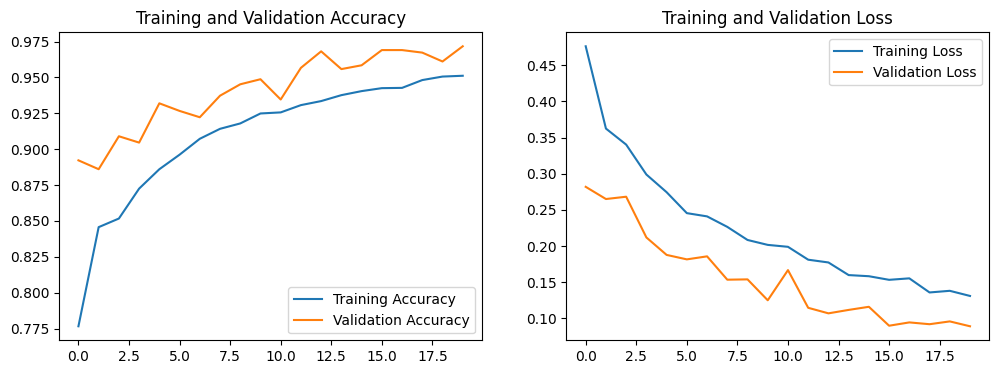

In [5]:
# python_code_step_3.py

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# --- (Assuming you have run Step 2 and have train_generator, validation_generator, test_generator) ---
# If running this file separately, you'll need to re-run the data preprocessing part from Step 2
# For simplicity, let's assume the generators are available from the previous run or you define them here again.

# Define image dimensions (must match the target_size from ImageDataGenerator)
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5), # Dropout for regularization to prevent overfitting
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Define callbacks for training
# EarlyStopping: Stop training when validation accuracy stops improving
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# ModelCheckpoint: Save the best model based on validation accuracy
checkpoint_path = "mask_detection_model.h5"
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   mode='max',
                                   verbose=1)

# Train the model
epochs = 20 # You can adjust this based on your dataset and hardware

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

print(f"\nModel training finished. Best model saved to: {checkpoint_path}")

# Evaluate the model on the test set
print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Optional: Plot training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()